Jan Wawrzynek GAAH Tight Binding Model


In [164]:
import numpy as np
from scipy import optimize, integrate
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 16,
})

import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad




kb = 8.62e-5
mu = 1
eV =1 
me = 0.1
#t = 1
t = np.arange(0,1e5,10)
hbar = 0.276*(np.sqrt(eV*me))

<ipython-input-165-21587858d669>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  fixed_integral = quad(En_dw2, 1, np.inf)[0]
<ipython-input-165-21587858d669>:16: RuntimeWarning: overflow encountered in exp
  En_dw = lambda omega : omega*((np.exp((omega - mu)/(kb*t)) + 1 )**-1)*(me*(np.exp(3/2))*np.sqrt(omega))/((np.sqrt(2))*(np.pi**2)*(hbar**3))


fixed integral -1.1349999983521069
(10000,)
(10000,)
(3.3483633257047507, 1.4708290229974256e-09) integral


Text(0.5, 0.98, 'energy density vs temperature plot')

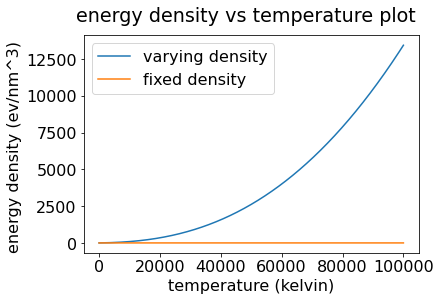

In [165]:
fixed_density = 2.27

# have part b on top computing the integral for the fixed electron density 
En_dw2 = lambda omega : omega*fixed_density
fixed_integral = quad(En_dw2, 1, np.inf)[0]
print('fixed integral', fixed_integral)
fixed_integral = [fixed_integral]*10000  
tf = np.arange(0,1e5,10)
print(np.shape(tf))
print(np.shape(fixed_integral))


# here is the main part of question 1. First I defined the energy density function
#using the functionn from the manual. 

En_dw = lambda omega : omega*((np.exp((omega - mu)/(kb*t)) + 1 )**-1)*(me*(np.exp(3/2))*np.sqrt(omega))/((np.sqrt(2))*(np.pi**2)*(hbar**3))
t = 1000 #here I tested out the integral for a single value to ensure that it was running correctly.
integral = quad(En_dw,1,np.inf)
print(integral, 'integral')
t = np.arange(10,1e5,10)
t_list = []
integrals = []
#here I iterated over a loop of temperature values, taking the integral every time. and adding to an empty list
for t in t:
    #quad(f_omega,1,2)[0]
    integral = quad(En_dw,1,np.inf)[0]
    integrals.append(integral)
    t_list.append(t)
    
#here I graphed the superimposed plots for varying and fixed electron density. 
fig, ax = plt.subplots()

ax.plot(t_list, integrals, label ='varying density' )  
ax.plot(tf, fixed_integral, label = 'fixed density')
ax.set(xlabel='temperature (kelvin)', ylabel = 'energy density (ev/nm^3) ')
ax.legend(['varying density', 'fixed density'])    

fig.suptitle('energy density vs temperature plot')
#ax.legend('varying density', 'fixed density')
#from the python runtime error, can see that the integral was improperly defined. 


Q2 \
Source = Lab solutions 2

Text(0.5, 0.98, 'EigenValues alpha = 1/3')

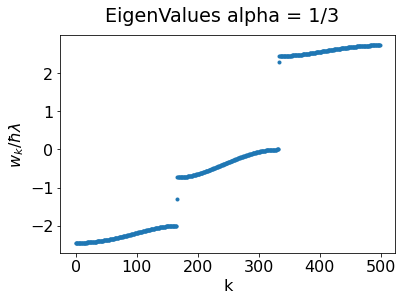

In [166]:

#here are the given parameters 
tun, alpha, L = 1,  1/3, 500 #here varied alpha to get the 3 sets of plots for alpha = 1, 1/2, 1/3
u_vals = 2

def tight_binding(tun, u, L):
    values = -tun*np.ones(L-1)
    return np.diag(values, 1) + np.diag(values, -1) + u*np.eye(L)





# Function to define the Aubry-Andre Hamiltonian
def aubry_andre(tun, u, alpha, L):
    H = tight_binding(tun, 0.0, L)
    diag_vals = [u*np.cos(2*np.pi*alpha*l) for l in range(L)]
    return H + np.diag(diag_vals,0)



# Find the eigenstates and eigenvalues
H = aubry_andre(tun, u_vals, alpha, L)
[w, psi] = np.linalg.eig(H)

# Sort them in order of increasing energy
inds = np.argsort(w)
w = w[inds]
psi = psi[:,inds]





fig, ax = plt.subplots()

ax.plot(w, marker = '.', linestyle = '')
ax.set(xlabel='k', ylabel = '$w_k/\hbar\lambda$')

fig.suptitle('EigenValues alpha = 1/3')


Text(0.5, 0.98, 'Unnormalised DOS, alpha = 1/3')

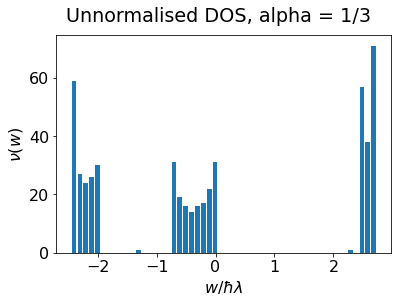

In [167]:
# Find the maximum and minimum energy
w_min, w_max = min(w), max(w)

# Divide by the bin width to find the number of bins
dw = tun/10
n_bins = int((w_max-w_min)/dw)+1

# Bin the data
DOS, bin_edges = np.histogram(w, bins = n_bins)
fig, ax = plt.subplots()
ax.bar(bin_edges[1:]-dw/2,DOS, width = 0.08)
ax.set(xlabel='$w/\hbar\lambda$', ylabel = '$\\nu(w)$')
fig.suptitle('Unnormalised DOS, alpha = 1/3')


Question 3 

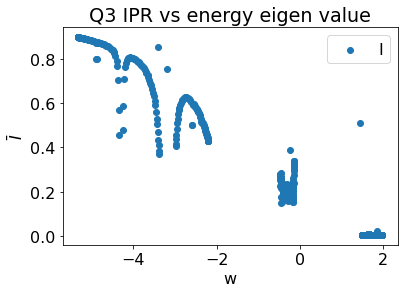

In [168]:
#Q3



beta = 0.6
tun = 1
u = 2
L = 500
alpha = 0.5*(1+5**0.5)
def aubry_andre(tun, u, alpha,beta, L):
    H = tight_binding(tun, 0.0, L)
    diag_vals = [((u*np.cos(2*np.pi*alpha*l))/(1 + beta*np.cos(2*np.pi*alpha*l))) for l in range(L)]
    return H + np.diag(diag_vals,0)



# Find the eigenstates and eigenvalues
H = aubry_andre(tun, u_vals, alpha,beta,  L)
[w, psi] = np.linalg.eig(H)

# Sort them in order of increasing energy
inds = np.argsort(w)
w = w[inds]
psi = psi[:,inds]




#import matplotlib.pyplot as plt

def IPR(psi):
    return sum(np.abs(psi)**4)
fig, ax = plt.subplots()
ax.set(xlabel = 'w',ylabel='$\\bar{I}$')
ax.set(title = 'Q3 IPR vs energy eigen value')
ax.scatter(w, IPR(psi), marker = 'o')
ax.legend('IPR')


In [169]:
print(max(IPR(psi)))
print(min(IPR(psi)))


0.898820656508862
0.004469902368373884


In [170]:
print(np.where(IPR(psi) ==max(IPR(psi))))
print(np.where(IPR(psi) ==min(IPR(psi))))
         

(array([0], dtype=int64),)
(array([404], dtype=int64),)


In [171]:
maxs = IPR(psi)[0]
mins = IPR(psi)[404]